# Lesson 4: Extracting restaurant information from journal entries

In this lesson you'll use an LLM to extract specific information from a text file - in this case restaurant names and signature dishes.

Start by importing some helper functions:

In [1]:
from helper_functions import *
from IPython.display import display, HTML

## Using AI to highlight important information

Load the journal entry for Rio de Janeiro, stored in the `rio_de_janeiro.txt` file. 
* You'll use a new helper function called `read_journal`
* Don't worry about how this works for now, you'll learn about it in a later lesson in this course

In [2]:
journal_rio_de_janeiro = read_journal("rio_de_janeiro.txt")

Next, write and print out a prompt that asks the LLM to highlight the restaurants and their best dishes in the journal entry:

In [3]:
prompt = f"""
Given the following journal entry from a food critic, identify the restaurants and their best dishes.
Highlight and bold each restaurant (in orange) and best dish (in blue) within the original text. 

Provide the output as HTML suitable for display in a Jupyter notebook. 

Journal entry:
{journal_rio_de_janeiro}
"""

print(prompt)


Given the following journal entry from a food critic, identify the restaurants and their best dishes.
Highlight and bold each restaurant (in orange) and best dish (in blue) within the original text. 

Provide the output as HTML suitable for display in a Jupyter notebook. 

Journal entry:
First up was Confeitaria Colombo, a legendary and picturesque café in central Rio. Known for its pastel de nata (custard tart), Colombo serves a delightful treat that is hard to beat. The crispy, flaky pastry filled with creamy, sweet custard was an excellent start to the day. The café's historic Belle Époque ambiance added an extra layer of charm.

Next, I visited Fogo de Chão, a quintessential Brazilian steakhouse in Botafogo. Famous for its picanha (top sirloin), this churrascaria impressed with its perfectly grilled meat. The picanha was juicy, tender, and bursting with flavor, showcasing the high quality of Brazilian beef. The endless array of grilled meats served tableside made for a hearty and 

Pass this prompt to an LLM and store the response in a variable called `html_response`. Then print the result:

In [4]:
html_response = get_llm_response(prompt)
print(html_response)

```html
<p>First up was <span style="color: orange; font-weight: bold;">Confeitaria Colombo</span>, a legendary and picturesque café in central Rio. Known for its <span style="color: blue; font-weight: bold;">pastel de nata</span> (custard tart), Colombo serves a delightful treat that is hard to beat. The crispy, flaky pastry filled with creamy, sweet custard was an excellent start to the day. The café's historic Belle Époque ambiance added an extra layer of charm.</p>

<p>Next, I visited <span style="color: orange; font-weight: bold;">Fogo de Chão</span>, a quintessential Brazilian steakhouse in Botafogo. Famous for its <span style="color: blue; font-weight: bold;">picanha</span> (top sirloin), this churrascaria impressed with its perfectly grilled meat. The picanha was juicy, tender, and bursting with flavor, showcasing the high quality of Brazilian beef. The endless array of grilled meats served tableside made for a hearty and satisfying meal.</p>

<p>For a more modern dining experi

The 'print' function here displays the raw text - including all of the HTML tags that a web browser uses to display the text with proper formatting. 
* Use display and HTML to display the HTML formatted output properly in the Jupyter notebook:

In [5]:
display(HTML(html_response))

Try the same steps with the Tokyo journal entry:

In [6]:
journal_tokyo = read_journal("tokyo.txt") 

prompt = f"""
Given the following journal entry from a food critic, identify the restaurants and their best dishes.
Highlight and bold each restaurant (in orange) and best dish (in blue) within the original text. 

Provide the output as HTML suitable for display in a Jupyter notebook. 

Journal entry:
{journal_tokyo}
"""

html_response = get_llm_response(prompt)
display(HTML(html_response))

Notice that even though the structure of this text is very different from the previous one, the LLM is able to identify and highlight the correct items.

## Try for yourself!

If you like, pause the video here and try modifying the prompt above to do other things, for example:
- Have the LLM highlight any desserts in green
- Have the LLM add a relevant emoji beside any ingredients

## Extracting restaurants and their best dishes

Next, you'll modify the prompt to extract the information from the text and list it out, instead of highlighting it.

Here is the modified prompt with the new instructions to save the data in CSV, or **Comma Separated Value** format:

In [7]:
prompt = f"""Please extract a comprehensive list of the restaurants 
and their respective best dishes mentioned in the following journal entry. 
Ensure that each restaurant name is accurately identified and listed. 

Provide your answer in CSV format, ready to save. 
Exclude the "```csv" declaration, don't add spaces after the comma, include column headers.

Format:
Restaurant, Dish
Res_1, Dsh_1
...

Journal entry:
{journal_rio_de_janeiro}
"""

restaurants_csv_ready_string = get_llm_response(prompt)

print(restaurants_csv_ready_string)

Restaurant,Dish  
Confeitaria Colombo,pastel de nata  
Fogo de Chão,picanha  
Olympe,moqueca de caju  
Aprazível,galinhada  


Notice how the output now only contains the restaurants and names of dishes. 

The first line indicates what information each row contains, in this case the name of the restaurant, then a comma, then the name of the dish.

## Looping through multiple journals

In this section, you'll iterate through all the journal entries using a `for` loop and extract the restaurants and best dishes from each file:

In [8]:
files = ["cape_town.txt", "istanbul.txt", "new_york.txt", "paris.txt", 
          "rio_de_janeiro.txt", "sydney.txt", "tokyo.txt"]

for file in files:
    #Open file and read contents
    journal_entry = read_journal(file)

    #Extract restaurants and display csv
    prompt =  f"""Please extract a comprehensive list of the restaurants 
    and their respective best dishes mentioned in the following journal entry. 
    
    Ensure that each restaurant name is accurately identified and listed. 
    Provide your answer in CSV format, ready to save.

    Exclude the "```csv" declaration, don't add spaces after the 
    comma, include column headers.

    Format:
    Restaurant, Dish
    Res_1, Dsh_1
    ...

    Journal entry:
    {journal_entry}
    """
    
    print(file)
    print_llm_response(prompt)
    print("") # Prints a blank line!

cape_town.txt
Restaurant,Dish  
The Test Kitchen,Pickled Fish Tacos  
La Colombe,Tuna La Colombe  
Harbour House,Grilled Kingklip  
The Pot Luck Club,Beef Tataki  

istanbul.txt
Restaurant,Dish
Çiya Sofrası,Kuzu Tandir
Karaköy Lokantası,Midye Dolma
Asitane,Mutancana
Mikla,Lamb Rump

new_york.txt
Restaurant, Dish
Katz's Delicatessen, pastrami on rye
Peter Luger Steak House, porterhouse steak
Lobster Place, lobster rolls
Gramercy Tavern, roasted chicken with seasonal vegetables

paris.txt
Restaurant,Dish  
Le Comptoir du Relais,Coq au Vin  
Le Jules Verne,Filet de Boeuf  
Pierre Hermé,Ispahan  
L'Ambroisie,Turbot with Artichokes and Truffle  

rio_de_janeiro.txt
Restaurant,Dish  
Confeitaria Colombo,pastel de nata  
Fogo de Chão,picanha  
Olympe,moqueca de caju  
Aprazível,galinhada  

sydney.txt
Restaurant, Dish
Saint Peter, Murray Cod
Billy Kwong, Crispy Skin Duck with Davidson’s Plum Sauce
The Lord Nelson Brewery Hotel, Roast Lamb
Vic's Meat Market, BBQ Beef Brisket
Bennelong, Sydney 

## Try for yourself! 
Try modifying the prompt inside the `for` loop above to extract different information. For example
* Extract the restaurant name and the neighborhood it is located in
* Extract each dish and it's main ingredient

## Writing Files

Here, you will learn how you can save files with the data you have created using Python and LLM.

As a reminder, print the html_response variable to see it's contents:

In [9]:
display(HTML(html_response))

Next, save the data in html_response to a file:

In [10]:
f = open("highlighted_text.html", 'w') 
f.write(html_response) 
f.close()

Note that you use `'w'` instead of `'r'` and `f.write` instead of `f.read` here, in contrast to when you read in a file.

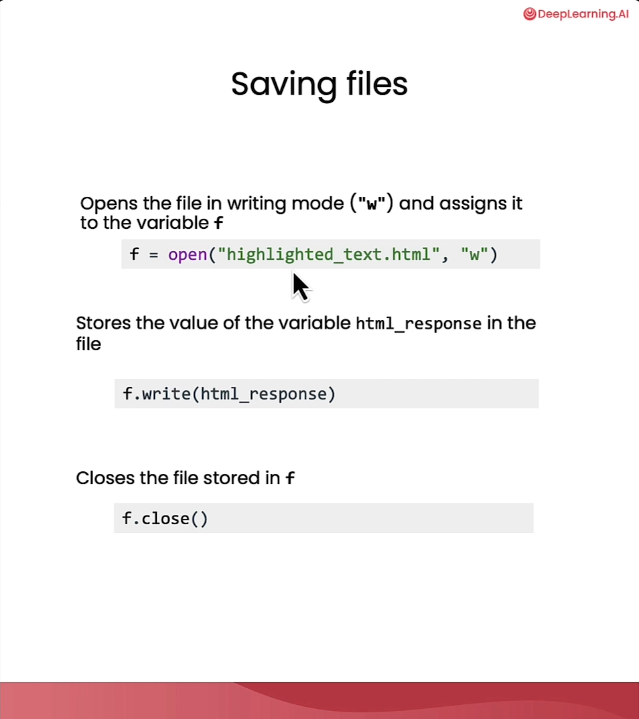

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>:
    <br><br>
    Explain this code line by line:
    <br><br>f = open("highlighted_text.html", 'w')
    <br>f.write(html_response)
    <br>f.close()
</p>

You can use the following button to download the file you just wrote above.
* Make sure to provide the right file name: 'highlighted_text.html' when asked!

In [11]:
download_file()

Output()

## Extra practice

### Exercise 1

Modify the prompt below to create an HTML file that highlights all the **restaurant names in green** and the **neighborhoods in pink** in the Sydney journal entry.

In [15]:
journal_sydney = read_journal("sydney.txt") 

# Modify the prompt below
prompt = f"""
Given the following journal entry from a food critic, identify the 
restaurants and their best dishes. Highlight and bold each restaurant 
(in green) and neighborhoods (in pink) within the original text. 

Provide the output as HTML suitable for display in a Jupyter notebook. 

Journal entry:
{journal_tokyo}
"""

html_sydney = get_llm_response(prompt)
display(HTML(html_sydney))

### Exercise 2

Modify the code below to save the output of the LLM to an HTML file. The file should be called `highlighted_sydney.html`.

In [17]:
f = open("highlighted_sydney.html", 'w') 

f.write(html_sydney) 
f.close()

You can then download the file, if you'd like!

In [18]:
download_file()

Output()